## Custom Dataset - Images

* (Optional) Download **Small** Dataset: [Kaggle - Cats Dogs Example](https://www.kaggle.com/dataset/c75fbba288ac0418f7786b16e713d2364a1a27936e63f4ec47502d73d6ef30ab)
* (Optional) Dowload **Full** Dataset: [Kaggle - Dogs v.s Cats](https://www.kaggle.com/c/dogs-vs-cats/data)
* Unzip archive.zip file, then the folder structure is like:
```
.
├── cats_dogs.csv
└── cats_dogs_resized
    ├── cat.0.jpg
    ├── cat.1.jpg
    ├── cat.2.jpg
    ...
    ├── dog.0.jpg
    └── dog.1.jpg
```

In [ ]:
!unzip archive.zip 

Archive:  archive.zip
  inflating: cats_dogs.csv           
  inflating: cats_dogs_resized/cat.0.jpg  
  inflating: cats_dogs_resized/cat.1.jpg  
  inflating: cats_dogs_resized/cat.2.jpg  
  inflating: cats_dogs_resized/cat.3.jpg  
  inflating: cats_dogs_resized/cat.4.jpg  
  inflating: cats_dogs_resized/cat.5.jpg  
  inflating: cats_dogs_resized/cat.6.jpg  
  inflating: cats_dogs_resized/cat.7.jpg  
  inflating: cats_dogs_resized/dog.0.jpg  
  inflating: cats_dogs_resized/dog.1.jpg  


### Import

In [ ]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import torchvision
from torchvision import transforms

import pandas as pd
import os
from skimage import io
import matplotlib.pyplot as plt

### CSV File

In [ ]:
csv_df = pd.read_csv('/content/cats_dogs.csv')

In [ ]:
csv_df.head(3)

,Animal,Label
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.2.jpg,0


In [ ]:
# see how to get image file name
csv_df['Animal'][0]

'cat.0.jpg'

### Custom Dataset Class

In [ ]:
class CatsDogsDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations) 

    def __getitem__(self, index):
        # get image file path by index 
        image_path = os.path.join(self.root_dir, self.annotations['Animal'][index])
        image = io.imread(image_path)

        # get label by index
        label = int(self.annotations['Label'][index])
        # to tensor
        label = torch.tensor(label)

        if self.transform:
            image = self.transform(image)

        return (image, label)

### Dataset & Dataloader

In [ ]:
# dataset
dataset = CatsDogsDataset(
    csv_file = '/content/cats_dogs.csv', 
    root_dir ='/content/cats_dogs_resized',
    transform = transforms.ToTensor()
)

# dataloader
dataloader = DataLoader(
    dataset = dataset,
    batch_size = 4,
    shuffle = True
)

## Iterate the dataset

Image Shape: torch.Size([4, 3, 224, 224])
Label Shape: torch.Size([4])



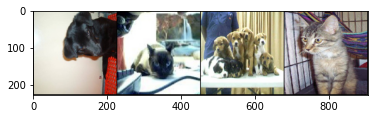

In [ ]:
for idx, (batch_images, batch_labels) in enumerate(dataloader):
    
    print('Image Shape:', batch_images.shape) # shape (B, C, H, W)
    print('Label Shape:', batch_labels.shape) 
    print('')
    
    # plot images
    grid = torchvision.utils.make_grid(batch_images)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    break

### Split Train/Test Set

In [ ]:
train_num, test_num = 8, 2
train_set, test_set = random_split(dataset, [train_num, test_num])

train_loader = DataLoader(
    dataset = train_set, 
    batch_size = 2,
    shuffle = True
)
test_loader = DataLoader(
    dataset = test_set,
    batch_size = 1,
    shuffle = True
)

Image Shape: torch.Size([2, 3, 224, 224])
Label Shape: torch.Size([2])



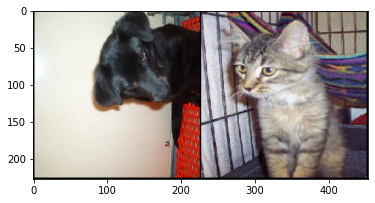

In [ ]:
for idx, (batch_images, batch_labels) in enumerate(train_loader):
    
    print('Image Shape:', batch_images.shape) # shape (B, C, H, W)
    print('Label Shape:', batch_labels.shape) 
    print('')
    
    # plot images
    grid = torchvision.utils.make_grid(batch_images)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    break

## Stock Dataset

In [1]:
import pandas as pd
import torch
from torch.utils.data import Dataset
import numpy as np

In [ ]:
df = pd.read_excel('stock.xlsx')
df.head()

,名稱,代碼,日期,開盤,最高,最低,收盤,漲跌
0,上證指數,980001,2017-01-03,3105.31,3136.46,3105.31,3135.92,1
1,上證指數,980001,2017-01-04,3133.79,3160.10,3130.11,3158.79,1
2,上證指數,980001,2017-01-05,3157.91,3168.50,3154.28,3165.41,1
3,上證指數,980001,2017-01-06,3163.78,3172.03,3153.03,3154.32,0
4,上證指數,980001,2017-01-09,3148.53,3173.14,3147.74,3171.24,1


In [ ]:
class StockDataset(Dataset):
    def __init__(self, seq_length, file_path, train=True, transform=None):
        
        # read file
        df = pd.read_excel(file_path)
        df_len = len(df) - 1

        df_len -= ( df_len % seq_length )
        total_size = df_len // seq_length
        train_size = int(total_size * 0.7)
        
        f = df.iloc[:(train_size*seq_length), 3:7] # data
        l = df.iloc[1:(train_size*seq_length)+1, 7:] #label
        data_size = train_size
        
        if not train:
            f = df.iloc[(train_size*seq_length):df_len, 3:7] # data
            l = df.iloc[(train_size*seq_length)+1:df_len+1, 7:] #label
            data_size = total_size - train_size
        
        self.features = np.array(f).reshape(data_size, seq_length, 4)
        self.labels = np.array(l).reshape(data_size, seq_length, 1)
        self.transform = transform
    
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):

        features = self.features[index]
        labels = self.labels[index]

        if self.transform:
            features = self.transform(features)
            labels = self.transform(labels)

        return features, labels

### Dataset & Dataloader

In [ ]:
def toTensor(x):
  return torch.tensor(x)

In [ ]:
train_dataset = StockDataset(
    file_path = '/content/stock.xlsx',
    seq_length = 3,
    train = True,
    transform = toTensor
)

test_dataset = StockDataset(
    file_path = '/content/stock.xlsx',
    seq_length = 3,
    train = False,
    transform = toTensor
    )

In [ ]:
fetures, labels = train_dataset[0:9]
fetures.shape, labels.shape

(torch.Size([9, 3, 4]), torch.Size([9, 3, 1]))

In [ ]:
train_loader = DataLoader(
    dataset = train_dataset, 
    batch_size = 5,
    shuffle = True)

test_loader = DataLoader(
    dataset = test_dataset, 
    batch_size = 5,
    shuffle = False
)

## Iterate the dataset

In [ ]:
for idx, (seqs, labels) in enumerate(train_loader):
  print(seqs.shape) # batch, seq, features
  print(seqs)
  break

torch.Size([5, 3, 4])
tensor([[[3136.4700, 3153.2600, 3132.8300, 3150.3300],
         [3147.4500, 3165.9200, 3146.1100, 3158.4000],
         [3149.5300, 3164.9500, 3135.3100, 3139.8800]],

        [[3268.9200, 3283.2400, 3262.1200, 3266.9600],
         [3265.6300, 3265.6300, 3246.0900, 3252.9500],
         [3252.8700, 3262.1000, 3233.2800, 3241.3100]],

        [[3104.9700, 3115.7800, 3094.0100, 3101.3000],
         [3095.8200, 3125.6600, 3095.2100, 3123.1400],
         [3125.4200, 3145.8400, 3125.4200, 3136.7700]],

        [[3242.2200, 3254.3400, 3239.8800, 3253.3300],
         [3252.6900, 3261.3800, 3243.8400, 3261.2200],
         [3258.8300, 3264.0800, 3236.3500, 3251.3800]],

        [[3047.5700, 3064.8100, 3022.3000, 3064.0800],
         [3055.3400, 3114.6600, 3052.8300, 3107.8300],
         [3101.2900, 3120.6600, 3100.3900, 3110.0600]]], dtype=torch.float64)
